In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

In [3]:
flight_data = pd.read_csv("flight_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'flight_data.csv'

In [4]:
flight_data.dep_time.head()

0    517.0
1    533.0
2    542.0
3    544.0
4    554.0
Name: dep_time, dtype: float64

In [5]:
# flight_data.dep_time = flight_data.dep_time.apply(pd.to_datetime)

In [6]:
# flight_data
# import datetime
# def convert_dattime(dattime):
    
#     if str(datetime) != "NaN":
#         print(datetime)
#         print(type(datetime))
#         return datetime.datetime.strptime(str(int(dattime)), '%H%M').strftime('%H:%M')
        
# flight_data['dep_time'] = flight_data['dep_time'].tail().apply(lambda x: convert_dattime(x))    
# flight_data['dep_time']

In [7]:
# type(datetime.datetime.strptime("2315", '%H%M').strftime('%H:%M'))

## Flight Dataset Info and Sample

In [8]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [9]:
# To get the no of rows and columns present in  the dataset
flight_data.shape

(336776, 19)

In [10]:
# report = pandas_profiling.ProfileReport(flight_data) 
# report.to_file(output_file="Flight_dataset_Prandas_profiing.html")

In [11]:
flight_data.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,01-01-2013 05:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,01-01-2013 06:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,01-01-2013 06:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,01-01-2013 06:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,01-01-2013 06:00


In [12]:
flight_data.tail(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,30-09-2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,30-09-2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,30-09-2013 22:00
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,30-09-2013 23:00
336770,2013,9,30,NaN,1842,NaN,NaN,2019,NaN,EV,5274,N740EV,LGA,BNA,NaN,764,18,42,30-09-2013 18:00
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00


In [13]:
flight_data.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [14]:
flight_data.drop(columns=['tailnum','year'], inplace=True)

In [15]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 43.7+ MB


## Correlations between the attributes

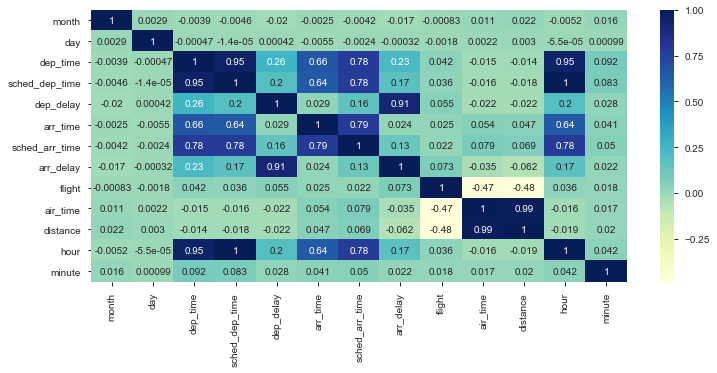

In [16]:
flight_data_corr=flight_data.corr()
plt.figure(figsize=(12,5))
sns.heatmap(flight_data_corr,annot=True, cmap="YlGnBu")

## Filling the missing values

In [17]:
flight_data['dep_delay'].fillna(flight_data['dep_delay'].interpolate(), inplace=True)
flight_data['arr_delay'].fillna(flight_data['arr_delay'].interpolate(), inplace=True)
flight_data['dep_time'].fillna(flight_data['dep_time'].interpolate(), inplace=True)
flight_data['arr_time'].fillna(flight_data['arr_time'].interpolate(), inplace=True)
flight_data['air_time'].fillna(flight_data['air_time'].interpolate(), inplace=True)

In [18]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
month             336776 non-null int64
day               336776 non-null int64
dep_time          336776 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         336776 non-null float64
arr_time          336776 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
origin            336776 non-null object
dest              336776 non-null object
air_time          336776 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(8), object(4)
memory usage: 43.7+ MB


In [19]:
flight_data.describe()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000
mean,6.548510,15.710787,1346.490699,1344.254840,14.093484,1475.177651,1536.380220,8.440162,1971.923620,150.654129,1039.912604,13.180247,26.230100
std,3.414457,8.768607,492.139834,467.335756,42.529939,555.863020,497.457142,46.570691,1632.471938,92.902789,733.233033,4.661316,19.300846
min,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,4.000000,8.000000,906.000000,906.000000,-5.000000,1050.000000,1124.000000,-17.000000,553.000000,83.000000,502.000000,9.000000,8.000000
50%,7.000000,16.000000,1359.000000,1359.000000,-1.000000,1520.000000,1556.000000,-4.000000,1496.000000,130.000000,872.000000,13.000000,29.000000
75%,10.000000,23.000000,1744.000000,1729.000000,12.000000,1935.000000,1945.000000,15.000000,3465.000000,191.800000,1389.000000,17.000000,44.000000
max,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [20]:
flight_data['total_delay'] =  flight_data['dep_delay'] + flight_data['arr_delay']
flight_data.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,13.0
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,24.0
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,35.0
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,-19.0
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,-31.0


## Business questions identified
1. Destination with maximum departure delays?
2. Destination with minimum departure delays ?
3. Delay calculations at the origin locations ?
4. Month during which Maximum Delays observed ?
5. Month during which Minimum Delays observed ?
6. Airline with highest and lowest mean speed ?
7. Airports most and least busy ?
8. Months During which airports are most and least busy ?



## Delay calculations at the Destination locations

In [21]:
#List of Origin Points
flight_data['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [22]:
#List of Origin Points
print("No of destinations :: " + str(flight_data['dest'].unique().size))
flight_data['dest'].unique()

No of destinations :: 105


array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [23]:
flight_data_arrival_delay  = flight_data.groupby(['dest']).agg({'arr_delay':[np.mean,np.size]}).sort_values(by=[('arr_delay','mean')], ascending=False)
flight_data_arrival_delay.head()

arr_delay       
           mean   size
dest                  
CAE   45.655602  116.0
TUL   39.441358  315.0
OKC   33.452004  346.0
TYS   28.638609  631.0
DSM   24.566572  569.0

In [24]:
flight_data_arrival_delay[('arr_delay','size')].describe()

count      105.000000
mean      3207.390476
std       4263.806458
min          1.000000
25%        346.000000
50%       1525.000000
75%       4113.000000
max      17283.000000
Name: (arr_delay, size), dtype: float64

In [25]:
flight_data_arrival_delay_200 = flight_data_arrival_delay[flight_data_arrival_delay[('arr_delay','size')]>200]
flight_data_arrival_delay_200.head()

arr_delay        
           mean    size
dest                   
TUL   39.441358   315.0
OKC   33.452004   346.0
TYS   28.638609   631.0
DSM   24.566572   569.0
RIC   23.216267  2454.0

In [26]:
flight_data_arrival_delay_200

arr_delay         
           mean     size
dest                    
TUL   39.441358    315.0
OKC   33.452004    346.0
TYS   28.638609    631.0
DSM   24.566572    569.0
RIC   23.216267   2454.0
CAK   21.373755    864.0
BHM   20.772439    297.0
GRR   20.738827    765.0
MSN   20.697344    572.0
GSP   19.769698    849.0
SAV   19.266486    804.0
MHT   19.258270   1009.0
CVG   18.785181   3941.0
DAY   18.653960   1525.0
PVD   18.578343    376.0
GSO   18.412801   1606.0
MCI   18.252016   2008.0
ALB   17.505405    439.0
IAD   16.948518   5700.0
OMA   16.473956    849.0
MKE   15.795237   2802.0
SDF   15.709200   1157.0
ORF   15.179085   1536.0
PHL   14.260321   1632.0
BNA   14.146842   6333.0
JAX   14.091869   2720.0
BWI   14.055578   1781.0
MEM   13.847317   1789.0
CHS   13.763390   2884.0
STL   13.587631   4339.0
...         ...      ...
DTW    7.730634   9384.0
HOU    7.602850   2115.0
SAT    7.420134    686.0
AUS    6.445158   2439.0
EGE    6.200637    213.0
MCO    5.805882  14082.0
PDX    5.356951   1354.0
ACK    4.867925    265.0
IAH    4.855582   7198.0
BOS    4.716533  15508.0
ABQ    4.381890    254.0
OAK    4.094907    312.0
RSW    3.682981   3537.0
SJC    3.575046    329.0
SAN    3.381193   2737.0
SRQ    3.220204   1211.0
SFO    3.093924  13331.0
MVY    2.991236    221.0
SJU    2.736381   5819.0
PHX    2.450490   4656.0
DFW    2.091137   8738.0
MIA    0.825679  11728.0
LAX    0.785825  16174.0
LAS    0.632887   5997.0
SLC    0.266546   2467.0
LGB    0.189114    668.0
SEA   -0.763107   3923.0
HNL   -1.113783    707.0
STT   -3.776423    522.0
SNA   -6.312778    825.0

[89 rows x 2 columns]

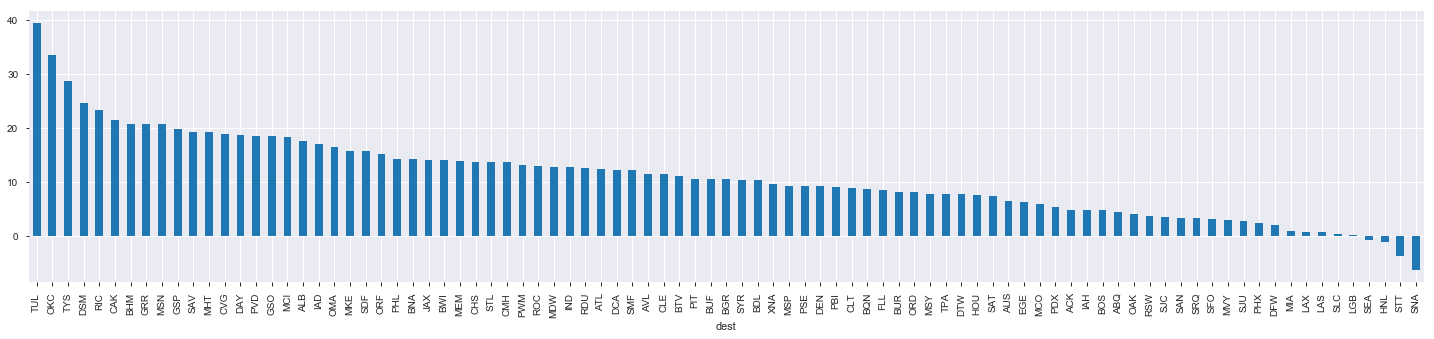

In [27]:
flight_data_arrival_delay_200[('arr_delay','mean')].plot(kind='bar',figsize=(25,5))

In [28]:
#Destinations which registered with higest and lowest arrival_delay
print("Destination with highest arrival_delay ::" + str(flight_data_arrival_delay_200.index[0]) 
      + " with average delay of " + str(round(flight_data_arrival_delay_200[('arr_delay','mean')].iloc[0],2)))
print("Destination with Lowest arrival_delay :: " + str(flight_data_arrival_delay_200.index[-1]) 
      + " with average delay of " + str(round(flight_data_arrival_delay_200[('arr_delay','mean')].iloc[-1],2)))


Destination with highest arrival_delay ::TUL with average delay of 39.44
Destination with Lowest arrival_delay :: SNA with average delay of -6.31


## Delay calculations at the origin locations

In [29]:
flight_data_departure_delay  = flight_data.groupby(['origin']).agg({'dep_delay':[np.mean,np.size]}).sort_values(by=[('dep_delay','mean')], ascending=False)
flight_data_departure_delay

dep_delay          
             mean      size
origin                     
EWR     16.683920  120835.0
JFK     13.158907  111279.0
LGA     12.096420  104662.0

In [30]:
#Destinations which registered with higest and lowest arrival_delay
print("Destination with highest departure_delay ::" + flight_data_departure_delay.index[0] 
      + " with average delay of " + str(flight_data_departure_delay[('dep_delay','mean')].iloc[0]))

print("Destination with Lowest departure_delay ::" + flight_data_departure_delay.index[-1] 
      + " with average delay of " + str(flight_data_departure_delay[('dep_delay','mean')].iloc[-1]))


Destination with highest departure_delay ::EWR with average delay of 16.683919838262316
Destination with Lowest departure_delay ::LGA with average delay of 12.096419717966226


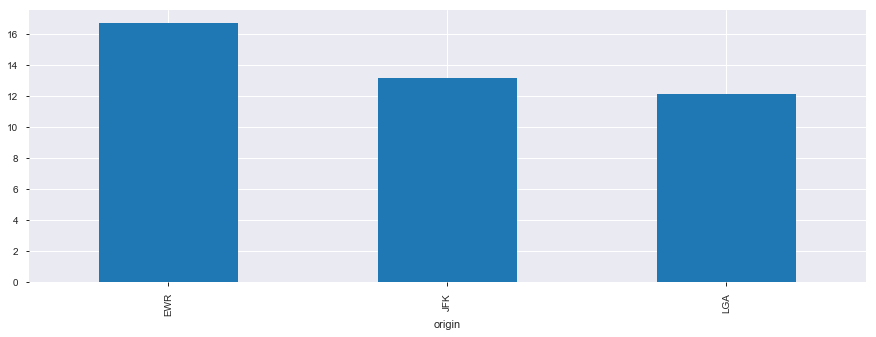

In [31]:
flight_data_departure_delay[('dep_delay','mean')].plot(kind='bar',figsize=(15,5))

##  Airlines  with Min & Max delays 

In [32]:
airlines_delay_summary  = flight_data.groupby(['carrier']).agg({'dep_delay':[np.mean],
                                                               'arr_delay':[np.mean,np.size]})
airlines_delay_summary

dep_delay  arr_delay         
              mean       mean     size
carrier                               
9E       20.705975  11.816619  18460.0
AA        9.625453   1.558092  32729.0
AS        5.868794  -9.861229    714.0
B6       13.526546   9.982258  54635.0
DL        9.602721   2.041593  48110.0
EV       23.081680  18.964462  54173.0
F9       20.528533  22.209782    685.0
FL       20.057408  21.343955   3260.0
HA        4.900585  -6.915205    342.0
MQ       13.225195  13.308563  26397.0
OO       20.836393  19.607783     32.0
UA       12.604828   4.167997  58665.0
US        5.706350   3.970937  20536.0
VX       12.982208   2.009636   5162.0
WN       18.271195  10.264344  12275.0
YV       24.361066  20.960066    601.0

In [33]:
airlines_delay_summary["total_mean_delay"] = airlines_delay_summary[('dep_delay','mean')] + airlines_delay_summary[('arr_delay','mean')]
airlines_delay_summary= airlines_delay_summary.sort_values(by='total_mean_delay', ascending=False)
airlines_delay_summary

dep_delay  arr_delay          total_mean_delay
              mean       mean     size                 
carrier                                                
YV       24.361066  20.960066    601.0        45.321132
F9       20.528533  22.209782    685.0        42.738315
EV       23.081680  18.964462  54173.0        42.046141
FL       20.057408  21.343955   3260.0        41.401363
OO       20.836393  19.607783     32.0        40.444176
9E       20.705975  11.816619  18460.0        32.522594
WN       18.271195  10.264344  12275.0        28.535539
MQ       13.225195  13.308563  26397.0        26.533758
B6       13.526546   9.982258  54635.0        23.508804
UA       12.604828   4.167997  58665.0        16.772825
VX       12.982208   2.009636   5162.0        14.991844
DL        9.602721   2.041593  48110.0        11.644314
AA        9.625453   1.558092  32729.0        11.183545
US        5.706350   3.970937  20536.0         9.677287
HA        4.900585  -6.915205    342.0        -2.014620
AS        5.868794  -9.861229    714.0        -3.992436

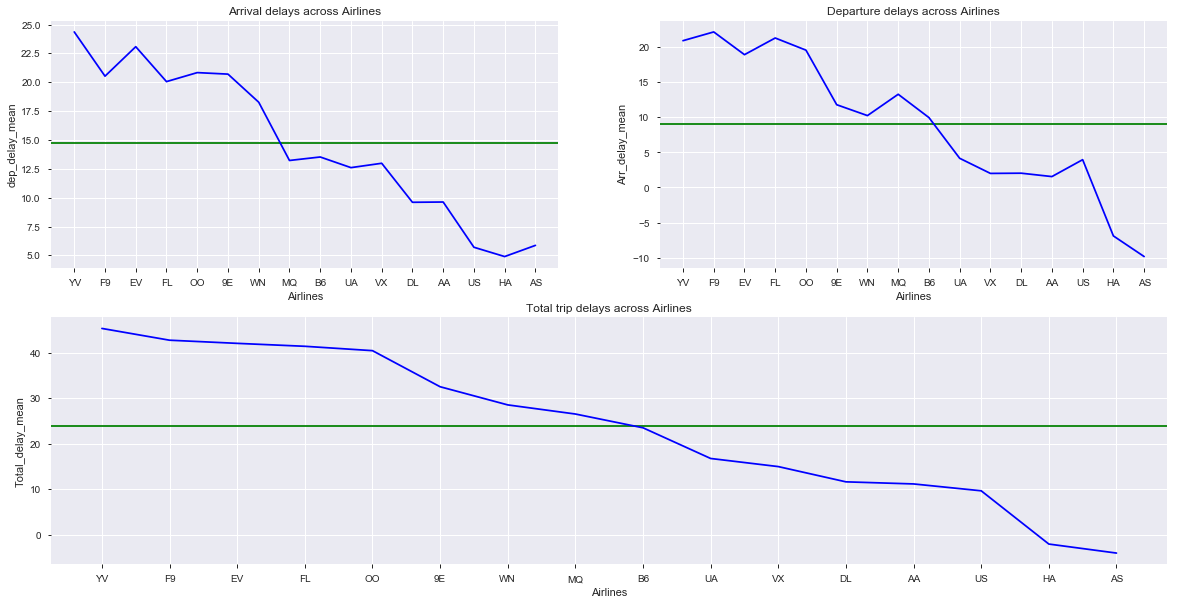

In [34]:
#Visulaisations of Airline based on the delay in arriavls, departures and sum of both
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
gs = gridspec.GridSpec(2, 2)
plt.subplot(gs[0, 0])
plt.xlabel ('Airlines')
plt.ylabel ('dep_delay_mean')
plt.title ('Arrival delays across Airlines')
plt.axhline(y=airlines_delay_summary[('dep_delay','mean')].mean(),color = 'g')
plt.plot(airlines_delay_summary[('dep_delay','mean')],'b')
plt.subplot(gs[0, 1])
plt.xlabel ('Airlines')
plt.ylabel ('Arr_delay_mean')
plt.title ('Departure delays across Airlines')
plt.axhline(y=airlines_delay_summary[('arr_delay','mean')].mean(),color = 'g')
plt.plot(airlines_delay_summary[('arr_delay','mean')], 'b')
plt.subplot(gs[1, :])
plt.xlabel ('Airlines')
plt.ylabel ('Total_delay_mean')
plt.title ('Total trip delays across Airlines')
plt.axhline(y=airlines_delay_summary['total_mean_delay'].mean(),color = 'g')
plt.plot(airlines_delay_summary['total_mean_delay'], 'b')

plt.show()

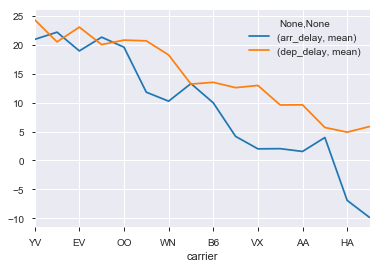

In [35]:
airlines_delay_summary.reset_index(inplace=True)
airlines_delay_summary.plot( x='carrier', y = [("arr_delay","mean"), ('dep_delay','mean')])

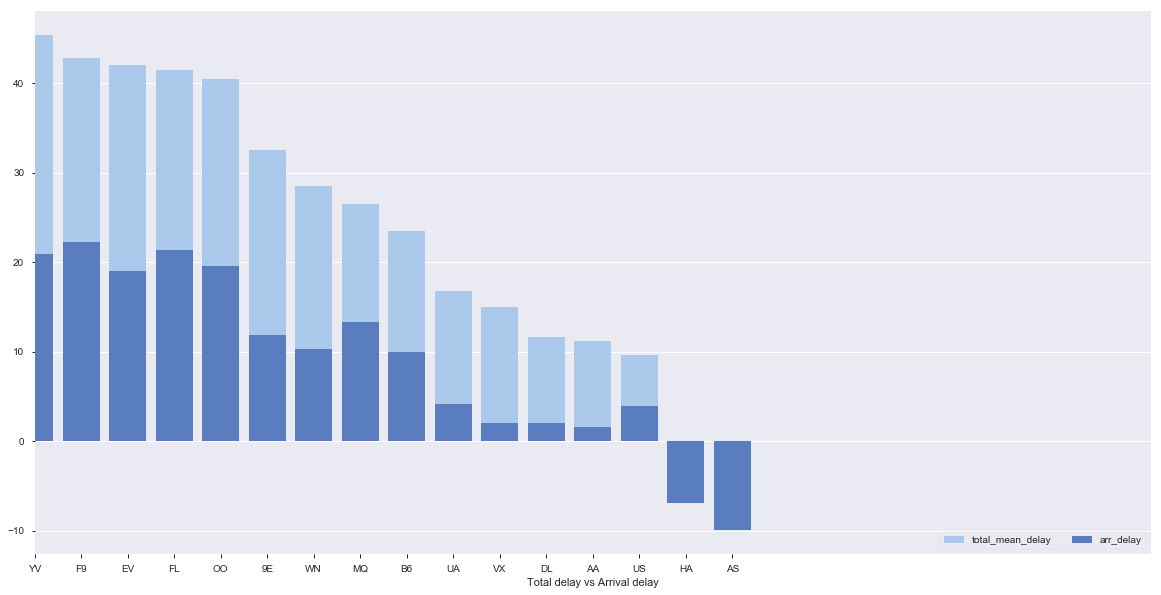

In [36]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Load the example car crash dataset
sns.set_color_codes("pastel")
sns.barplot(x="carrier", y="total_mean_delay", data=airlines_delay_summary,
            label="total_mean_delay", color="b")

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x="carrier", y=('arr_delay','mean'), data=airlines_delay_summary,
            label="arr_delay", color="b")

# Plot the crashes where alcohol was involved


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Total delay vs Arrival delay")
sns.despine(left=True, bottom=True)

In [37]:
# Airlines with maximum mean Departure , arrival and overall delays forte year 2013
airlines_delay_summary.set_index('carrier', inplace=True)
print("Airline with Max mean Departure Delay :: " + str(airlines_delay_summary[('dep_delay','mean')].idxmax()) + " with mean value " + str(airlines_delay_summary[('dep_delay','mean')].max()))
print("Airline with Max mean arrival Delay :: " + str(airlines_delay_summary[('arr_delay','mean')].idxmax()) + " with mean value " + str(airlines_delay_summary[('arr_delay','mean')].max()))
print("Airline with Max mean Delay :: " + str(airlines_delay_summary['total_mean_delay'].idxmax()) + " with mean value " + str(airlines_delay_summary['total_mean_delay'].max()))

Airline with Max mean Departure Delay :: YV with mean value 24.361065723071487
Airline with Max mean arrival Delay :: F9 with mean value 22.20978203456369
Airline with Max mean Delay :: YV with mean value 45.321131546355424


In [38]:
# Airlines with Minimun mean Departure , arrival and overall delays forte year 2013
print("Airline with Min mean Departure Delay :: " + str(airlines_delay_summary[('dep_delay','mean')].idxmin()) + " with mean value " + str(airlines_delay_summary[('dep_delay','mean')].min()))
print("Airline with Min mean arrival Delay :: " + str(airlines_delay_summary[('arr_delay','mean')].idxmin()) + " with mean value " + str(airlines_delay_summary[('arr_delay','mean')].min()))
print("Airline with Min mean Delay :: " + str(airlines_delay_summary['total_mean_delay'].idxmin()) + " with mean value " + str(airlines_delay_summary['total_mean_delay'].min()))

Airline with Min mean Departure Delay :: HA with mean value 4.900584795321637
Airline with Min mean arrival Delay :: AS with mean value -9.861229456528642
Airline with Min mean Delay :: AS with mean value -3.9924358459967824


In [39]:
#Effect  of the Depature delays over the Overall journey delay 
dep_percentage = airlines_delay_summary[('dep_delay','mean')].sum()/12/(airlines_delay_summary['total_mean_delay'].sum()/12)*100
print("Percentage of depature delay on overall delay :: " + str(round(dep_percentage,2)) + "%")

Percentage of depature delay on overall delay :: 61.86%


## Destination Airports which are Most and least Busy

In [40]:

    
print("Destination airpot which is most busy :: " + str(flight_data_arrival_delay[('arr_delay','size')].idxmax()) + 
      "\nTotal no of fligts arrived ::" + str(flight_data_arrival_delay[('arr_delay','size')].max()))

print("\n\nDestination airpot which is least busy :: " + str(flight_data_arrival_delay[('arr_delay','size')].idxmin()) + 
      "\nTotal no of fligts arrived ::" + str(flight_data_arrival_delay[('arr_delay','size')].min()))


Destination airpot which is most busy :: ORD
Total no of fligts arrived ::17283.0


Destination airpot which is least busy :: LGA
Total no of fligts arrived ::1.0


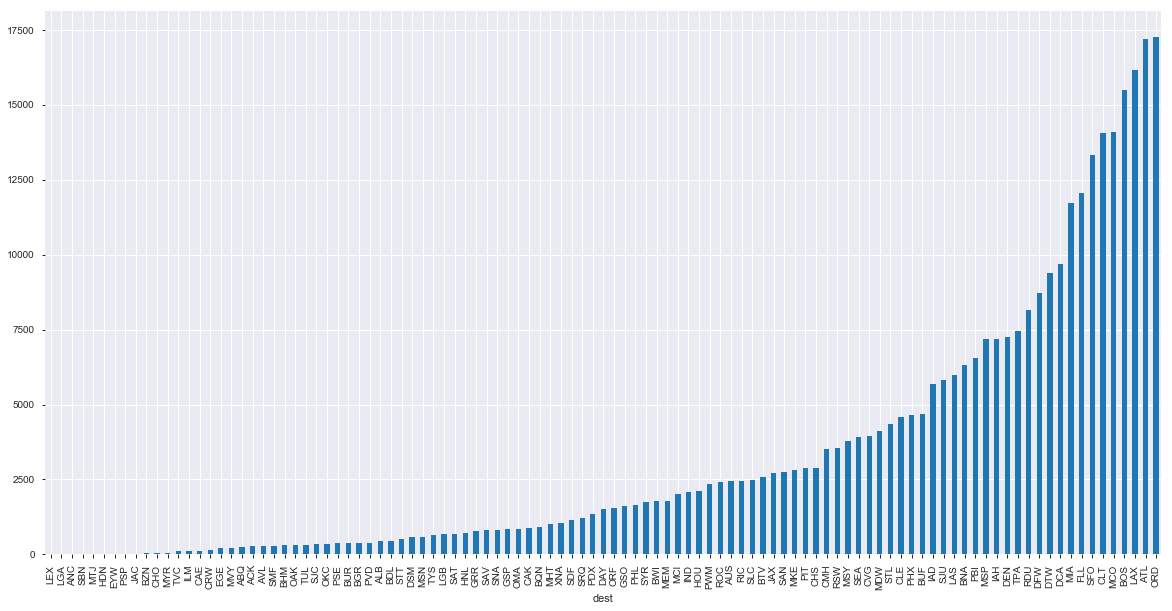

In [41]:
flight_data_arrival_delay[('arr_delay','size')].sort_values( ascending=True).plot(kind='Bar',figsize=(20, 10))

In [42]:
flight_data_arrival_delay[('arr_delay','size')].sort_values( ascending=True).head()

dest
LEX     1.0
LGA     1.0
ANC     8.0
SBN    10.0
MTJ    15.0
Name: (arr_delay, size), dtype: float64

In [43]:
flight_data[flight_data.dest=='ORD']

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
5,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,EWR,ORD,150.0,719,5,58,01-01-2013 05:00,8.0
9,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,LGA,ORD,138.0,733,6,0,01-01-2013 06:00,6.0
25,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,EWR,ORD,139.0,719,6,0,01-01-2013 06:00,40.0
38,1,1,629.0,630,-1.0,824.0,810,14.0,AA,303,LGA,ORD,140.0,733,6,30,01-01-2013 06:00,13.0
57,1,1,656.0,700,-4.0,854.0,850,4.0,AA,305,LGA,ORD,143.0,733,7,0,01-01-2013 07:00,0.0
70,1,1,709.0,700,9.0,852.0,832,20.0,UA,1092,LGA,ORD,135.0,733,7,0,01-01-2013 07:00,29.0
73,1,1,715.0,713,2.0,911.0,850,21.0,UA,544,EWR,ORD,156.0,719,7,13,01-01-2013 07:00,23.0
88,1,1,739.0,745,-6.0,918.0,930,-12.0,AA,309,LGA,ORD,137.0,733,7,45,01-01-2013 07:00,-18.0
96,1,1,749.0,710,39.0,939.0,850,49.0,MQ,3737,EWR,ORD,148.0,719,7,10,01-01-2013 07:00,88.0
137,1,1,828.0,830,-2.0,1027.0,1012,15.0,B6,905,JFK,ORD,160.0,740,8,30,01-01-2013 08:00,13.0


In [44]:
flight_data[flight_data.dest=='LGA']

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
275945,7,27,1179.5,106,0.5,379.5,245,12.5,US,1632,EWR,LGA,200.0,17,1,6,27-07-2013 01:00,13.0


## NYC Airports which are Most and least Busy

In [45]:
print("NYC airpot which is most busy :: " + str(flight_data_departure_delay[('dep_delay','size')].idxmax()) + 
      "\nTotal no of fligts departed ::" + str(flight_data_departure_delay[('dep_delay','size')].max()))

print("\n\nNYC airpot which is least busy :: " + str(flight_data_departure_delay[('dep_delay','size')].idxmin()) + 
      "\nTotal no of fligts departed ::" + str(flight_data_departure_delay[('dep_delay','size')].min()))


NYC airpot which is most busy :: EWR
Total no of fligts departed ::120835.0


NYC airpot which is least busy :: LGA
Total no of fligts departed ::104662.0


## Month during which Max & Min Delays are observed

In [46]:
flight_delay_table = flight_data.groupby(['month']).agg({'dep_delay':[np.mean],'arr_delay':[np.mean,np.size]})
flight_delay_table

dep_delay  arr_delay         
            mean       mean     size
month                               
1      10.903403   7.006869  27004.0
2      11.830347   6.590036  24951.0
3      14.366807   7.279999  28834.0
4      16.219538  13.290999  28330.0
5      14.731369   5.360119  28796.0
6      23.605531  19.568973  28243.0
7      24.571946  19.641699  29425.0
8      13.506325   6.974051  29327.0
9       8.098517  -2.528016  27574.0
10      6.920731   0.442729  28889.0
11      5.470056   0.522829  27268.0
12     17.791239  16.189675  28135.0

In [47]:

flight_delay_table['total_delay'] = flight_delay_table[('dep_delay','mean')] + flight_delay_table[('arr_delay','mean')]
flight_delay_table

dep_delay  arr_delay          total_delay
            mean       mean     size            
month                                           
1      10.903403   7.006869  27004.0   17.910273
2      11.830347   6.590036  24951.0   18.420384
3      14.366807   7.279999  28834.0   21.646806
4      16.219538  13.290999  28330.0   29.510537
5      14.731369   5.360119  28796.0   20.091488
6      23.605531  19.568973  28243.0   43.174503
7      24.571946  19.641699  29425.0   44.213645
8      13.506325   6.974051  29327.0   20.480376
9       8.098517  -2.528016  27574.0    5.570501
10      6.920731   0.442729  28889.0    7.363460
11      5.470056   0.522829  27268.0    5.992885
12     17.791239  16.189675  28135.0   33.980913

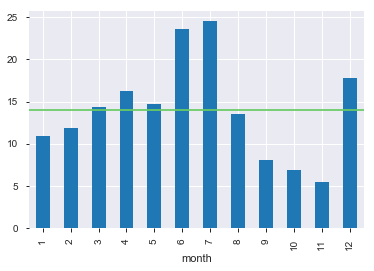

In [48]:
flight_delay_table[('dep_delay','mean')].plot(kind='bar')
plt.axhline(y=flight_delay_table[('dep_delay','mean')].mean(),color = 'g')

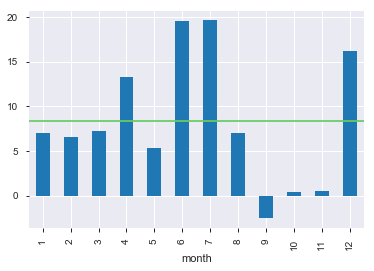

In [49]:
flight_delay_table[('arr_delay','mean')].plot(kind='bar')
plt.axhline(y=flight_delay_table[('arr_delay','mean')].mean(),color = 'g')

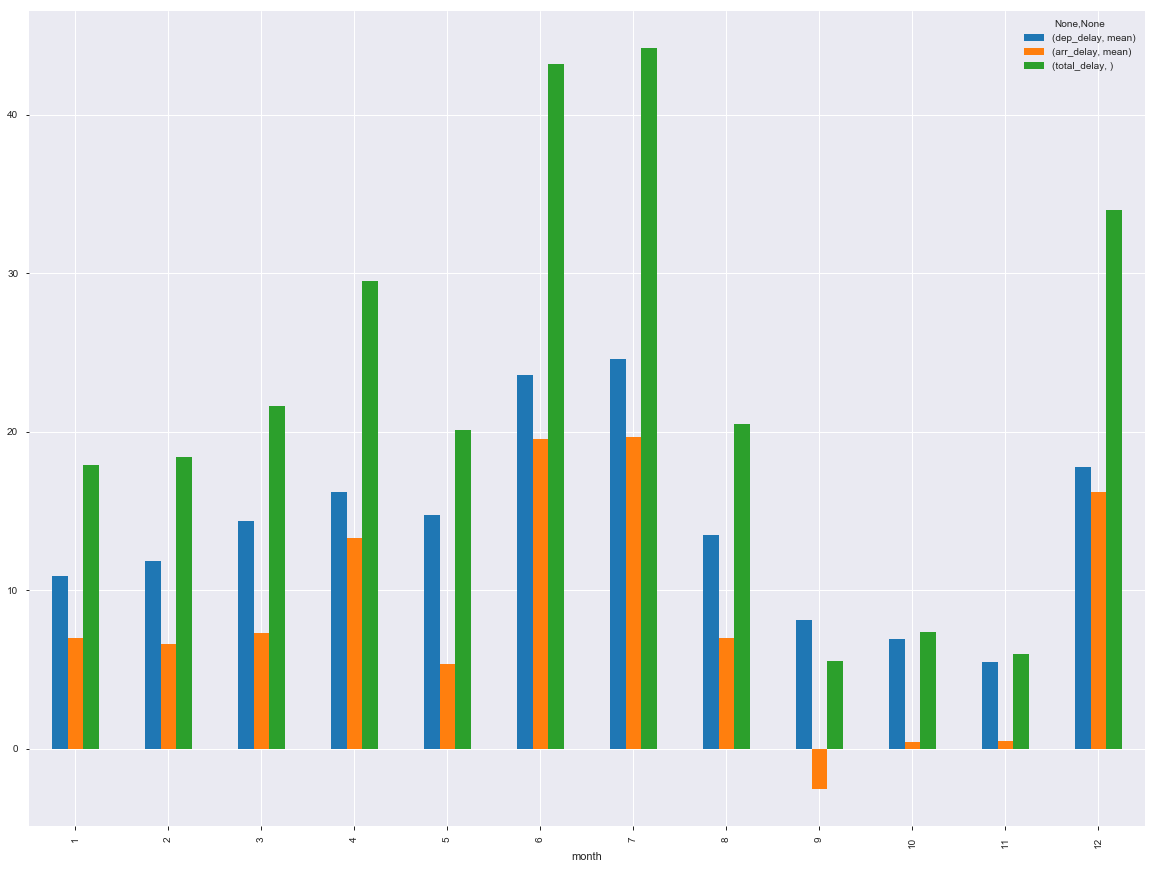

In [50]:
flight_delay_table.reset_index(inplace=True)
flight_delay_table.drop(columns=[('arr_delay','size')], inplace=True)
flight_delay_table.plot(kind='bar', x='month',figsize=(20, 15))

In [51]:
flight_delay_table.set_index('month', inplace=True)
flight_delay_table.sort_values(by='total_delay', ascending=False)

,dep_delay,arr_delay,total_delay
,mean,mean,
month,,,
7,24.571946,19.641699,44.213645
6,23.605531,19.568973,43.174503
12,17.791239,16.189675,33.980913
4,16.219538,13.290999,29.510537
3,14.366807,7.279999,21.646806
8,13.506325,6.974051,20.480376
5,14.731369,5.360119,20.091488
2,11.830347,6.590036,18.420384


In [52]:
print("Maximum delays observed on Month " + str(flight_delay_table['total_delay'].idxmax()) + " of value:: " + str(round(flight_delay_table['total_delay'].max(),2)))
print("Minimum delays observed on Month " + str(flight_delay_table['total_delay'].idxmin()) + " of value:: " + str(round(flight_delay_table['total_delay'].min(),2)))

Maximum delays observed on Month 7 of value:: 44.21
Minimum delays observed on Month 9 of value:: 5.57


In [53]:
print("Maximum delay observed across all the airlines for year 2013 ::" + str(flight_data.at[flight_data['total_delay'].idxmax(),'time_hour']) + " by the carrier " + str(flight_data.at[flight_data['total_delay'].idxmax(),'carrier']))
print("Minimum  delay observed across all the airlines for year 2013 ::" + str(flight_data.at[flight_data['total_delay'].idxmin(),'time_hour']) + " by the carrier " + str(flight_data.at[flight_data['total_delay'].idxmin(),'carrier']))

Maximum delay observed across all the airlines for year 2013 ::09-01-2013 09:00 by the carrier HA
Minimum  delay observed across all the airlines for year 2013 ::07-05-2013 17:00 by the carrier VX


## Month during which airports are most and least busy

In [54]:
flight_delay_table = flight_data.groupby(['month']).agg({'dep_delay':[np.mean],'arr_delay':[np.mean,np.size]})

In [55]:
flight_delay_table.head()

dep_delay  arr_delay         
            mean       mean     size
month                               
1      10.903403   7.006869  27004.0
2      11.830347   6.590036  24951.0
3      14.366807   7.279999  28834.0
4      16.219538  13.290999  28330.0
5      14.731369   5.360119  28796.0

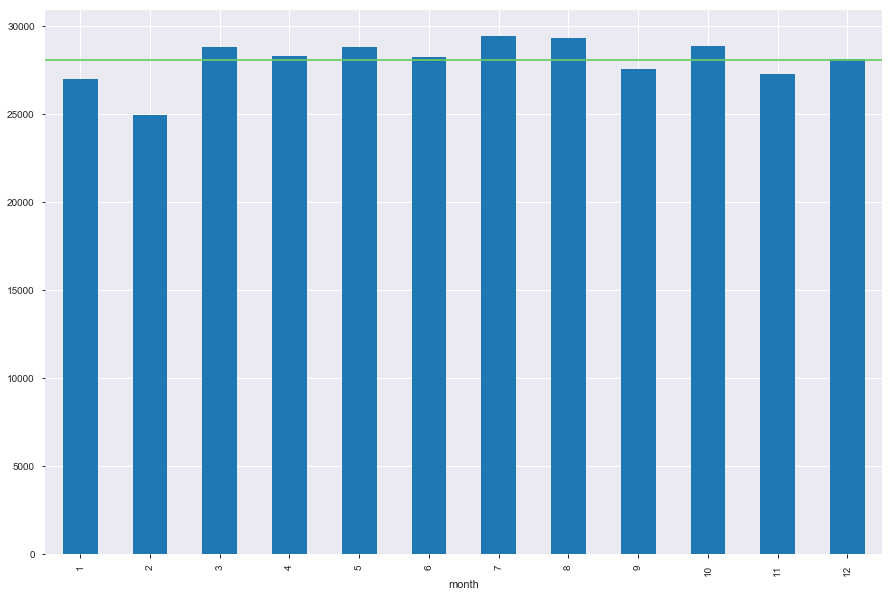

In [56]:
flight_delay_table[('arr_delay','size')].plot(kind='bar', figsize=(15,10))
plt.axhline(y=flight_delay_table[('arr_delay','size')].mean(),color = 'g')

In [57]:
print("Month during which destination aiports are most busy " + str(flight_delay_table[('arr_delay','size')].max()) 
      + "\nAirports most busy on  :: " + str(flight_delay_table[('arr_delay','size')].idxmax()))

print("Month during which destination aiports are least busy " + str(flight_delay_table[('arr_delay','size')].min()) 
      + "\nAirports most busy on  :: " + str(flight_delay_table[('arr_delay','size')].idxmin()))

Month during which destination aiports are most busy 29425.0
Airports most busy on  :: 7
Month during which destination aiports are least busy 24951.0
Airports most busy on  :: 2


# Fastest & Slowest airlines 

In [58]:
flight_data.head(5)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,total_delay
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,13.0
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,24.0
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,35.0
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,-19.0
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,-31.0


In [59]:
#grouping by based on the carrier by taking mean air time
carrier_traveldurations = flight_data.groupby('carrier').agg({'air_time':[np.mean,np.size]})
carrier_traveldurations

air_time         
               mean     size
carrier                     
9E        90.616664  18460.0
AA       187.911289  32729.0
AS       324.587837    714.0
B6       151.149862  54635.0
DL       173.622552  48110.0
EV        93.490001  54173.0
F9       229.093795    685.0
FL       102.438357   3260.0
HA       623.087719    342.0
MQ        93.977395  26397.0
OO        81.686807     32.0
UA       210.879852  58665.0
US        90.432589  20536.0
VX       335.517162   5162.0
WN       147.886149  12275.0
YV        72.175904    601.0

In [60]:
#calculating the flight speed for each record based on the distance covered and air time
flight_data['flight_speed'] =  flight_data['distance']/flight_data['air_time']
flight_data.head(5)

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,total_delay,flight_speed
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,13.0,6.167401
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,24.0,6.237885
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,35.0,6.806250
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,-19.0,8.612022
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,-31.0,6.568966


In [61]:
#grouping by based on the carrier by taking mean flight speed
carrier_speeds = flight_data.groupby('carrier').agg({'flight_speed':[np.mean,np.size]})
carrier_speeds

flight_speed         
                mean     size
carrier                      
9E          5.668833  18460.0
AA          7.013905  32729.0
AS          7.439867    714.0
B6          6.677085  54635.0
DL          6.983229  48110.0
EV          5.958088  54173.0
F9          7.119279    685.0
FL          6.542650   3260.0
HA          8.005962    342.0
MQ          6.070949  26397.0
OO          6.250719     32.0
UA          7.090471  58665.0
US          5.609777  20536.0
VX          7.515878   5162.0
WN          6.691738  12275.0
YV          5.338562    601.0

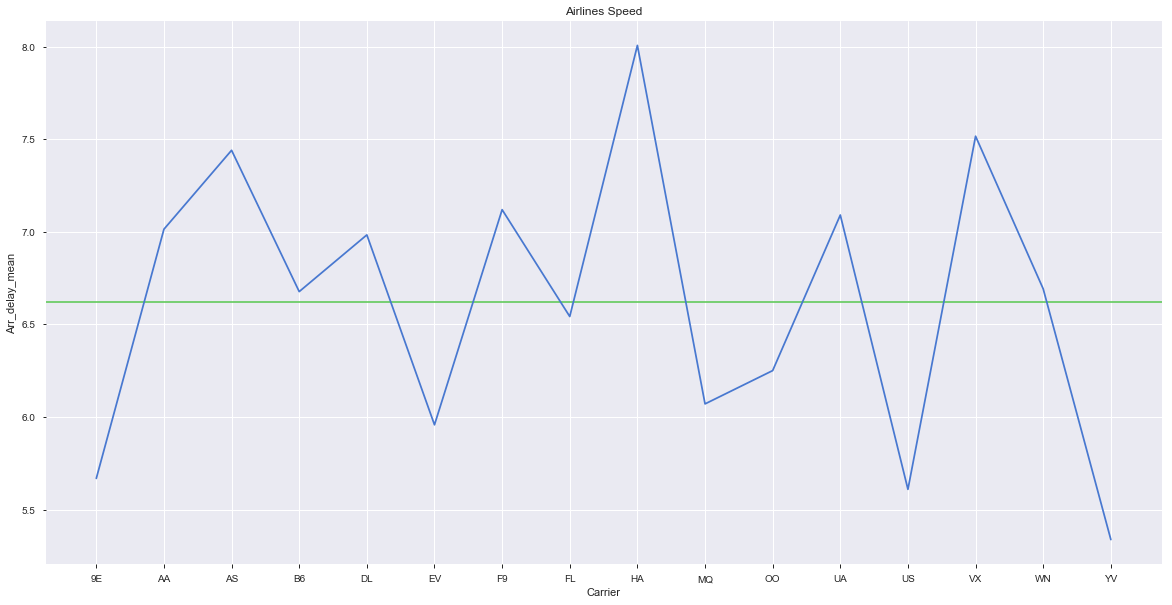

In [62]:
# Plotting graphs related to average flight speeds and average time saved
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.xlabel ('Carrier')
plt.ylabel ('Arr_delay_mean')
plt.title ('Airlines Speed')
plt.axhline(y=carrier_speeds[('flight_speed','mean')].mean(),color = 'g')
plt.plot(carrier_speeds[('flight_speed','mean')], 'b')


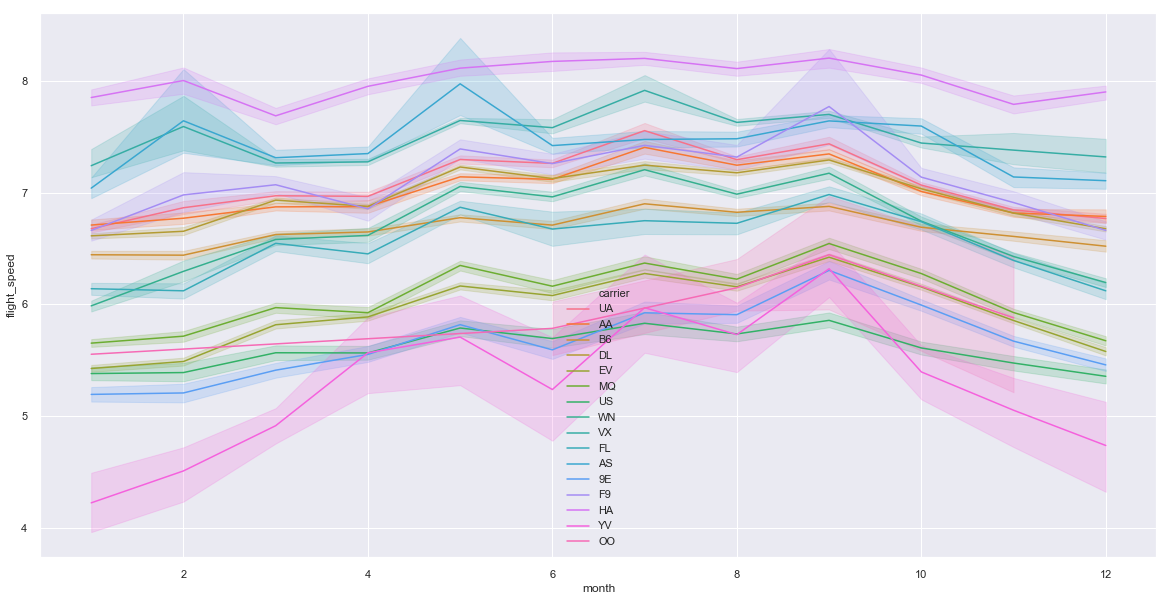

In [63]:
# Ploting graph for different carriers across each month based on the average flight speed
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))

# Plot the responses for different carriers across each month
sns.lineplot(x="month", y = "flight_speed",
             hue="carrier",
             data=flight_data)

In [64]:
print("Airline with highest speed recorded for year 2013 ::" + str(flight_data.at[flight_data['flight_speed'].idxmax(),'time_hour']) + " by the carrier " + str(flight_data.at[flight_data['flight_speed'].idxmax(),'carrier']))
print("With flight speed of " + str(round(flight_data.at[flight_data['flight_speed'].idxmax(),'flight_speed'],2)) + " miles per minute")


print("\nAirline with Lowest flight speed recorded for year 2013 ::" + str(flight_data.at[flight_data['flight_speed'].idxmin(),'time_hour']) + " by the carrier " + str(flight_data.at[flight_data['flight_speed'].idxmin(),'carrier']))
print("With flight speed of " + str(round(flight_data.at[flight_data['flight_speed'].idxmin(),'flight_speed'],2)) + " miles per minute")



Airline with highest speed recorded for year 2013 ::07-12-2013 13:00 by the carrier B6
With flight speed of 78.25 miles per minute

Airline with Lowest flight speed recorded for year 2013 ::27-07-2013 01:00 by the carrier US
With flight speed of 0.08 miles per minute


In [65]:
print("Airline with Maximum mean speed recorded for year 2013 ::" + str(round(carrier_speeds['flight_speed','mean'].max(),2)) + " by the carrier " + str(carrier_speeds['flight_speed','mean'].idxmax()))
print("Airline with minimum mean speed recorded for year 2013 ::" + str(round(carrier_speeds['flight_speed','mean'].min(),2)) + " by the carrier " + str(carrier_speeds['flight_speed','mean'].idxmin()))

Airline with Maximum mean speed recorded for year 2013 ::8.01 by the carrier HA
Airline with minimum mean speed recorded for year 2013 ::5.34 by the carrier YV
